# comment
- 2.1问完成的很好
- 2.2问可以进一步思考为什么要求对朗道分布做一个截断才能最后得到趋近于高斯分布的结果，如果没有截断呢 (已添加绘图和原因）
- 尚未提交推导2.3问的相对误差公式 (已经上传在HW2的文件夹下，名字为"RE推导.pdf")

In [1]:
//%jsroot on

# 定义取数获得的直方图

In [2]:
TH1F* distri(string filename, TH1F *hist){

    ifstream in(filename);
    
    string s;
    float count_num, count_res, space;

    //getline(in, s);

    while(!in.eof()){

        in >> count_num >> count_res;
        getline(in, s);//读取每一行剩余数据
        if(in.eof()) break;//避免最后一个重复读取

        hist->Fill(count_res);//填充直方图

    }

    in.close();
    return hist;
}

# 定义填充每五个事例时间间隔的直方图

In [3]:
TH1F* interval_per_five(string filename, TH1F *hist){

    ifstream in(filename);
    
    string s;
    float count_num, count_res, space;
    double interval_5;

    //getline(in, s);

    int i = 0;

    while(!in.eof()){
        i = i + 1;
        in >> count_num >> count_res;
        interval_5 = interval_5 + count_res;//将相邻事件的间隔进行累加
        getline(in, s);
        if(in.eof()) break;

        if (i%5 == 0){//每累加五次进行一次直方图填充，即为每五个事例时间间隔
            hist->Fill(interval_5);
            interval_5 = 0;//填充完后赋值0
        }
    }

    in.close();
    return hist;
}

# 绘制曲线进行拟合

In [4]:
void counting(){

    string f1 = "high_counts.txt";
    string f2 = "low_counts.txt";
    string f3 = "counts_per_second.txt";
    string f4 = "time_interval.txt";

    TH1F *high_hist = new TH1F("high", " ", 25, 400, 900);
    TH1F *low_hist = new TH1F("low", " ", 15, 0, 15);

    TH1F *per_sec = new TH1F("per_sec", " ", 40, 600, 1000);
    TH1F *time_interval = new TH1F("time_interval", " ", 100, 0, 5000);
    TH1F *interval5 = new TH1F("interval5", " ", 200, 0, 20000);

    TF1 *poisson = new TF1("poisson", "[0]*TMath::PoissonI(x, [1])", 0, 15);
    poisson->SetParameters(10, 3);
    poisson->SetParLimits(1, 1, 5);

    TCanvas *c1 = new TCanvas("c1", " ", 800, 600);
    c1->Divide(2,1);
    c1->cd(1);
    distri(f1, high_hist)->Draw();
    distri(f1, high_hist)->Fit("gaus");

    c1->cd(2);
    //distri(f2, low_hist)->Scale(1/distri(f2, low_hist)->Integral());
    distri(f2, low_hist)->Draw();
    distri(f2, low_hist)->Fit("poisson","R");
    poisson->Draw("same");
    
    c1->Draw();

    TCanvas *c2 = new TCanvas("c2", " ", 800, 600);
    c2->Divide(3, 1);
    c2->cd(1);
    distri(f3, per_sec)->GetXaxis()->SetTitle("counts per sec");
    distri(f3, per_sec)->Draw();

    c2->cd(2);
    distri(f4, time_interval)->GetXaxis()->SetTitle("time interval");
    distri(f4, time_interval)->Draw();
    distri(f4, time_interval)->Fit("expo");
    
    c2->cd(3);
    interval_per_five(f4, interval5)->GetXaxis()->SetTitle("time interval every 5 events");
    interval_per_five(f4, interval5)->Draw();
    
    c2->Draw();
}

 FCN=17.7856 FROM MIGRAD    STATUS=CONVERGED      59 CALLS          60 TOTAL
                     EDM=3.27129e-07    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     4.94996e+03   4.79398e+01   8.19066e-02  -1.27848e-06
   2  Mean         6.65982e+02   2.06787e-01   4.36407e-04  -3.89478e-03
   3  Sigma        2.63653e+01   1.50732e-01   3.24780e-06  -3.05908e-02
 FCN=11.8573 FROM MIGRAD    STATUS=CONVERGED      52 CALLS          53 TOTAL
                     EDM=3.43516e-08    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           1.63750e+04   1.27984e+02   2.24023e-01   1.10267e-06
   2  p1           3.00175e+00   1.36068e-02   1.19119e-05   3.24366e-02
 FCN=455.424 FROM MIGRAD    STATU

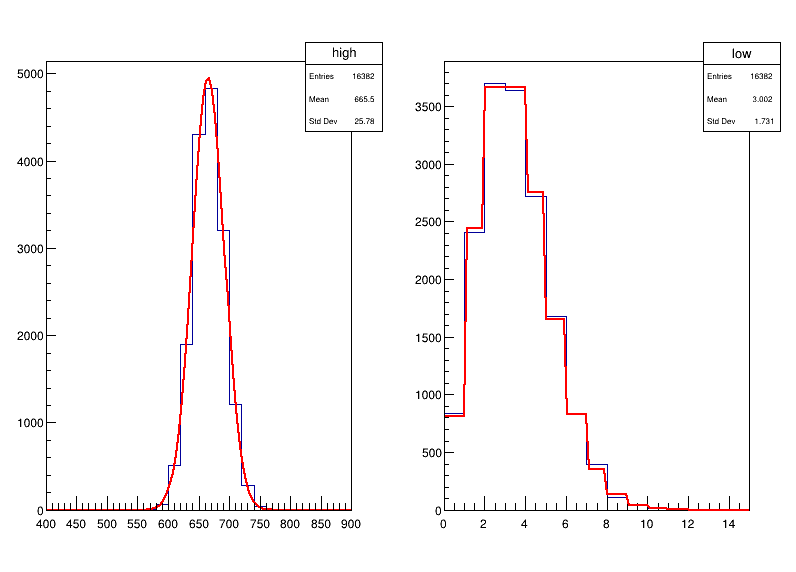

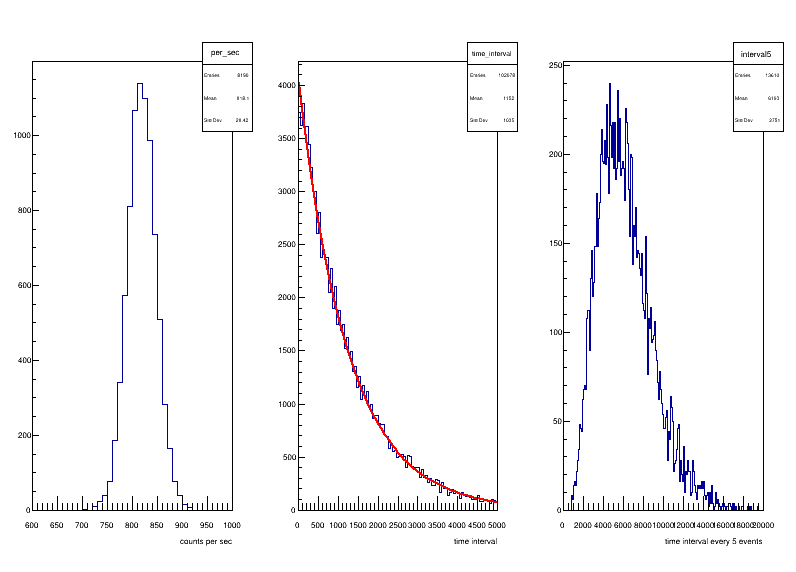

In [5]:
counting();

<font size = 4> 可以看到，高斯分布的mean值为6.66e+02，sigma值为2.64e+01，与预期sigma等于mean值的开方相符合

# 利用exp函数对中心极限定理进行验证

<font size =4> 首先定义随机产生的exp分布数值的函数

In [6]:
double Ran_Random(TRandom *rn){

    double rx = rn->Exp(0.5);
    return rx;
    
}

<font size =4> 生成并绘制2个、5个、10个、20个、100个rx值求和的分布

In [7]:
void exp_central_limit(){
    TRandom3 *rn = new TRandom3(0);
    TCanvas *c2 = new TCanvas("c1", " ", 800, 600);
    c2->Divide(3,2);
//绘制未求和时随机取数的分布
    TH1F *h0=new TH1F("h0","Exponential random distribution",100,0,100);
    for(int i=0;i<10000;i++) {

        h0->Fill(Ran_Random(rn)*100);
    }
    c2->cd(1);
    h0->Draw();
    
//定义TH1F
    TH1F *h2=new TH1F("h2","sum1-2",200,0,100);
    TH1F *h5=new TH1F("h5","sum1-5",200,0,100);
    TH1F *h10=new TH1F("h10","sum1-10",200,0,100);
    TH1F *h20=new TH1F("h20","sum1-20",200,0,100);
    TH1F *h100=new TH1F("h100","sum1-100",200,0,100);

    for(int i = 0; i < 1e6; i++){
        double rx = 0;
        for(int j = 0; j < 100; j++){
            rx += Ran_Random(rn);//对不同的求和分别进行填充
            if(j==1) h2->Fill(rx*50);
            if(j==4) h5->Fill(rx*20);
            if(j==9) h10->Fill(rx*10);
            if(j==19) h20->Fill(rx*5);
            if(j==99) h100->Fill(rx);
        }
    }//图像绘制
    c2->cd(2);
    h2->Draw();
    c2->cd(3);
    h5->Draw();
    c2->cd(4);
    h10->Draw();
    c2->cd(5);
    h20->Draw();
    c2->cd(6);
    h100->Draw();
    h100->Fit("gaus");//对100个rx求和的分布进行拟合
    c2->Draw();
}

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


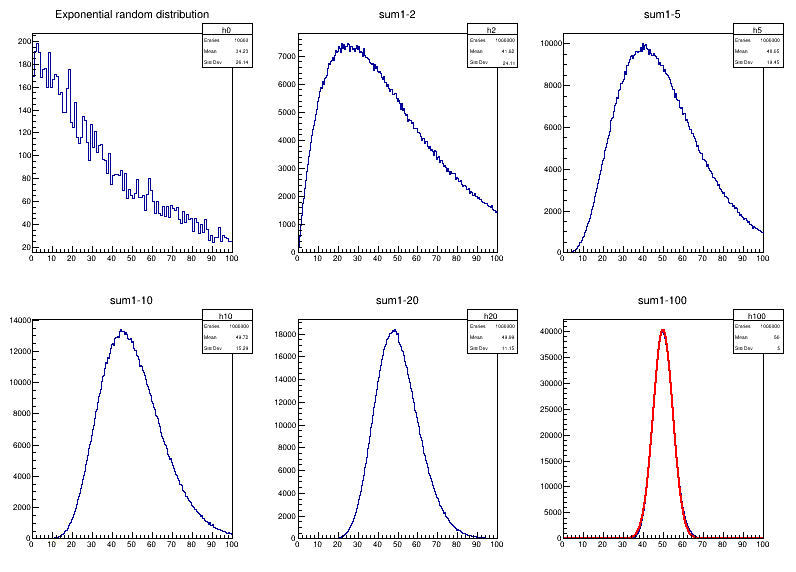

 FCN=7082.39 FROM MIGRAD    STATUS=CONVERGED      64 CALLS          65 TOTAL
                     EDM=7.5549e-09    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     4.04061e+04   4.90905e+01   1.66637e+00  -2.93242e-06
   2  Mean         4.99936e+01   5.12175e-03   2.02184e-04   5.52838e-03
   3  Sigma        4.90177e+00   3.35697e-03   7.45281e-06  -4.61473e-01


In [8]:
exp_central_limit();

<font size =4> 由最后的分布可见，与高斯分布符合得相当好

# 通过Landau分布来验证中心极限定理

In [9]:
//定义朗道分布的随机取数
double Lan_Random(TRandom *rn){

    double rx = rn->Landau();
    if(rx <= 100) return rx;//对朗道分布进行截断
    else return -1;
    
}

In [10]:
void landau_central_limit(){
    TRandom3 *rn_l = new TRandom3(0);
    TCanvas *c1 = new TCanvas("c1", " ", 800, 600);
    c1->Divide(3,2);
//绘制未求和时随机取数的分布
    TH1F *h0_l=new TH1F("h0_l","Landau random distribution",70,0,700);
    for(int i=0;i<10000;i++) {

        h0_l->Fill(Lan_Random(rn_l)*100);
    }
    c1->cd(1);
    h0_l->Draw();
    
//定义TH1F
    TH1F *h2_l=new TH1F("h2_l","sum1-2",70,0,700);
    TH1F *h5_l=new TH1F("h5_l","sum1-5",70,0,700);
    TH1F *h10_l=new TH1F("h10_l","sum1-10",70,0,700);
    TH1F *h20_l=new TH1F("h20_l","sum1-20",70,0,700);
    TH1F *h100_l=new TH1F("h100_l","sum1-100",70,0,700);

    for(int i = 0; i < 1e6; i++){
        double rx = 0;
        for(int j = 0; j < 100; j++){
            rx += Lan_Random(rn_l);//对不同的求和分别进行填充
            if(j==1) h2_l->Fill(rx*50);
            if(j==4) h5_l->Fill(rx*20);
            if(j==9) h10_l->Fill(rx*10);
            if(j==19) h20_l->Fill(rx*5);
            if(j==99) h100_l->Fill(rx);
        }
    }//图像绘制
    c1->cd(2);
    h2_l->Draw();
    c1->cd(3);
    h5_l->Draw();
    c1->cd(4);
    h10_l->Draw();
    c1->cd(5);
    h20_l->Draw();
    c1->cd(6);
    h100_l->Draw();
    h100_l->Fit("gaus");//对100个rx求和的分布进行拟合
    c1->Draw();
}

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


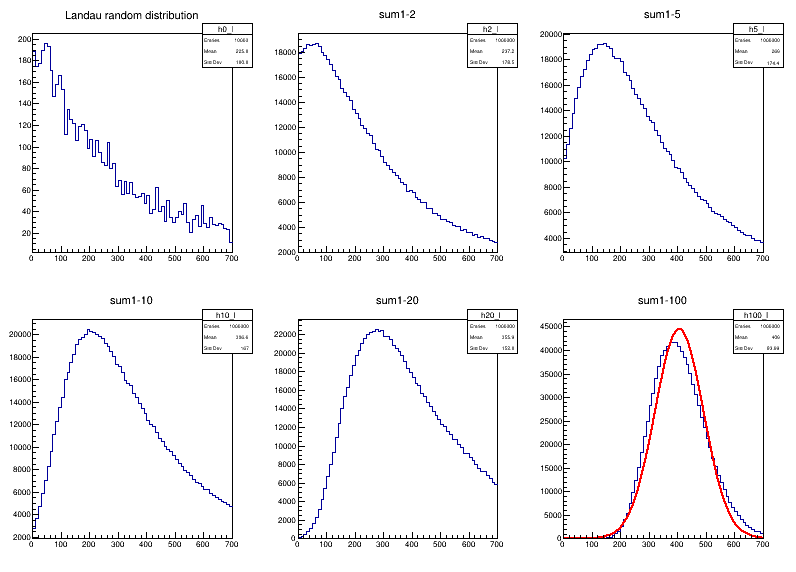

 FCN=47314.6 FROM MIGRAD    STATUS=CONVERGED      88 CALLS          89 TOTAL
                     EDM=5.40531e-08    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     4.44395e+04   5.38426e+01   4.84787e+00   3.77722e-06
   2  Mean         4.06798e+02   1.09312e-01   9.31426e-03  -3.08515e-03
   3  Sigma        8.51305e+01   5.50291e-02   1.55298e-05   1.16201e+00


In [11]:
landau_central_limit();

<font size = 4> 从Landau分布的绘制可见，对于加和数目的增多整个曲线分布逐渐向高斯分布靠拢，但与exp函数相比符合程度还差一些。

# 不对Landau分布做截断的结果
<font size =4> 下图绘制了不对Landau分布进行截断时累加一百次的分布以及高斯拟合

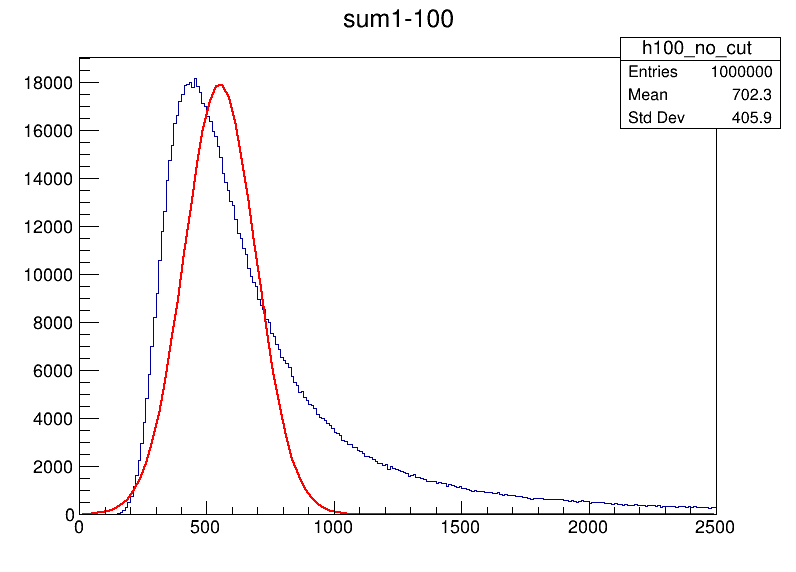

 FCN=313325 FROM MIGRAD    STATUS=CONVERGED     126 CALLS         127 TOTAL
                     EDM=4.25207e-07    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     1.79224e+04   3.17163e+01   6.16436e+00   7.99265e-06
   2  Mean         5.52923e+02   3.96685e-01   4.86032e-02  -2.78460e-03
   3  Sigma        1.40676e+02   1.75248e-01   2.64665e-05   1.73379e+00


In [12]:
TRandom3 *no_cut = new TRandom3(0);
TCanvas *c3 = new TCanvas("c3", " ", 800, 600);

TH1F *h100_no_cut=new TH1F("h100_no_cut","sum1-100",250,0,2500);

for(int i = 0; i < 1e6; i++){
        double rx = 0;
        for(int j = 0; j < 100; j++){
            rx += no_cut->Landau();
            
            if(j==99) h100_no_cut->Fill(rx);
        }
}

h100_no_cut->Draw();
h100_no_cut->Fit("gaus");
c3->Draw();

<font size = 4> 如果不对Landau分布做截断，进行100次累加依然会出现较长的尾巴和与高斯分布较大的偏离，这是因为Landau分布没有确定的mean值和variance，所以需要对该分布进行截断，否则很难与高斯分布相符合

<font size = 4> 结论：由最后的拟合可以看出，100个随机值求和之后的分布基本就是高斯分布，从而验证了中心极限定理。也可以通过别的分布来验证中心极限定理，发现在100个随机值求和之后均为标准的高斯分布